In [71]:
import pandas as pd

In [72]:
weather = pd.read_csv("ny_data.csv", index_col='DATE')

/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_93949/2414039795.py:1: DtypeWarning: Columns (7,11,17,23,31,33,35,37,39,41,43,45,47,49,51,53,55,65,67,69,71,73,75,77,79,81,83,85,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("ny_data.csv", index_col='DATE')


In [73]:
weather.loc["1970-01-01"]

STATION                            USW00094728
NAME               NY CITY CENTRAL PARK, NY US
LATITUDE                              40.77898
LONGITUDE                            -73.96925
ELEVATION                                 42.7
                              ...             
WT19_ATTRIBUTES                            NaN
WT21                                       NaN
WT21_ATTRIBUTES                            NaN
WT22                                       NaN
WT22_ATTRIBUTES                            NaN
Name: 1970-01-01, Length: 89, dtype: object

In [74]:
# Clean up data
# Find percentage of null values
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION            0.000000
NAME               0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
ELEVATION          0.000000
                     ...   
WT19_ATTRIBUTES    0.990950
WT21               0.999949
WT21_ATTRIBUTES    0.999949
WT22               0.995702
WT22_ATTRIBUTES    0.995702
Length: 89, dtype: float64

In [15]:
# Data documentation
# PRCP - Precipitation
# TMAX - Max Temperature
# SNOW - Snow lol

In [75]:
weather_data = weather[["PRCP", "SNOW", "TMAX", "TSUN", "TMIN"]].copy()
# Check if NaNs present
weather_data = weather_data.fillna(method="ffill")
weather_data.apply(pd.isnull).sum()

/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_93949/1919264911.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data = weather_data.fillna(method="ffill")


PRCP    0
SNOW    0
TMAX    0
TSUN    0
TMIN    0
dtype: int64

In [83]:
weather_data

,PRCP,SNOW,TMAX,TSUN,TMIN
DATE,,,,,
1970-01-01,0.00,0.0,25,36.0,19
1970-01-02,0.00,0.0,30,492.0,18
1970-01-03,0.04,0.0,36,0.0,25
1970-01-04,0.00,0.0,31,504.0,20
1970-01-05,0.00,0.0,34,504.0,18
...,...,...,...,...,...
2024-02-20,0.00,0.0,40,0.0,26
2024-02-21,0.00,0.0,43,0.0,30
2024-02-22,0.04,0.0,45,0.0,35


In [76]:
# Split training and test data
# 80-20 split
train = weather_data[:"2013-12-31"]
test = weather_data["2014-01-01":]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [78]:
train_features = ["PRCP", "SNOW", "TSUN", "TMIN" ]
model = LinearRegression()
model.fit(train[train_features], train["TMAX"])

LinearRegression()

In [79]:
predictions = model.predict(test[train_features])

# Evaluate the model's performance
mse = mean_squared_error(test["TMAX"], predictions)
print(f"Test MSE: {mse}")


Test MSE: 26.304512693051304


In [80]:
combined = pd.concat([test["TMAX"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [81]:
combined

,actual,predictions
DATE,,
2014-01-01,33,37.089917
2014-01-02,33,28.820807
2014-01-03,18,19.341337
2014-01-04,29,20.231668
2014-01-05,40,39.956347
...,...,...
2024-02-20,40,39.197198
2024-02-21,43,43.411761
2024-02-22,45,48.595823


<Axes: xlabel='DATE'>

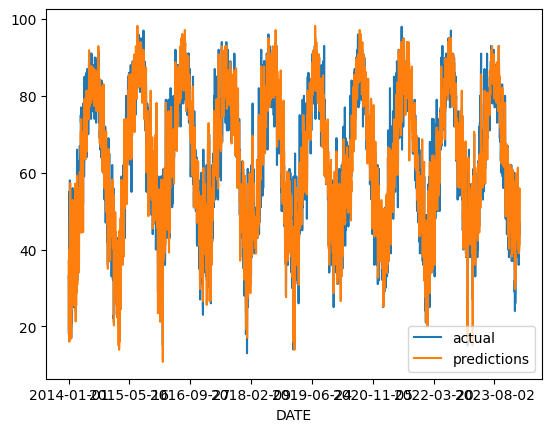

In [82]:
combined.plot()